
Normal Distribution Plot by name from pandas dataframe

# This is a level 1 heading
## This is a level 2 heading


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


Name
adam      AxesSubplot(0.125,0.125;0.775x0.755)
farley    AxesSubplot(0.125,0.125;0.775x0.755)
joe       AxesSubplot(0.125,0.125;0.775x0.755)
matt      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Zscore, dtype: object

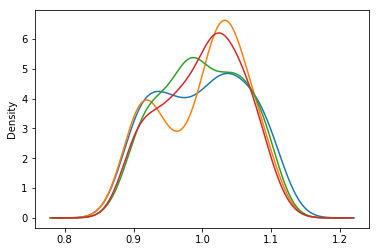

In [5]:
np.random.seed([3,1415])
df = pd.DataFrame(dict(
        Name='matt joe adam farley'.split() * 100,
        Seconds=np.random.randint(4000, 5000, 400)
    ))

df['Zscore'] = df.groupby('Name').Seconds.apply(lambda x: x.div(x.mean()))

df.groupby('Name').Zscore.plot.kde()


4 <pandas.core.groupby.groupby.SeriesGroupBy object at 0x7fa0ce32c240>


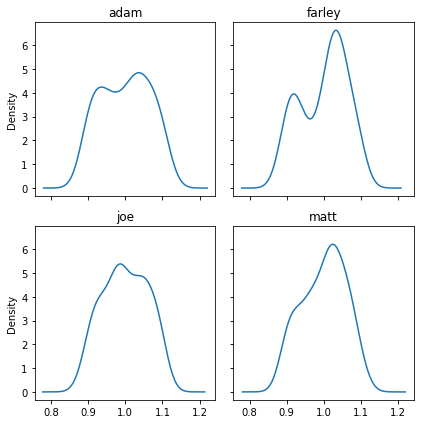

In [14]:
# split out plots
g = df.groupby('Name').Zscore
n = g.ngroups
print(n, g)
fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    group.plot.kde(title=name, ax=axes[r, c])
fig.tight_layout()



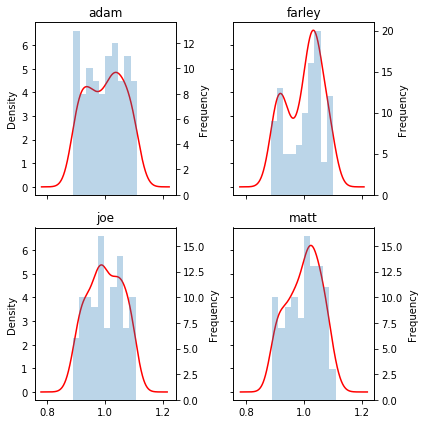

In [15]:
# kde + hist
g = df.groupby('Name').Zscore
n = g.ngroups
fig, axes = plt.subplots(n // 2, 2, figsize=(6, 6), sharex=True, sharey=True)
for i, (name, group) in enumerate(g):
    r, c = i // 2, i % 2
    a1 = axes[r, c]
    a2 = a1.twinx()
    group.plot.hist(ax=a2, alpha=.3)
    group.plot.kde(title=name, ax=a1, c='r')
fig.tight_layout()


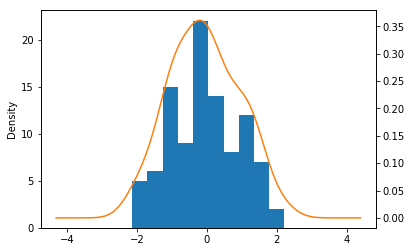

In [16]:
# Plotting a dataframe as both a 'hist' and 'kde' on the same plot
import pandas as pd
import numpy as np


np.random.seed([3,1415])
df = pd.DataFrame(np.random.randn(100, 2), columns=list('ab'))

ax = df.a.plot(kind='hist')
df.a.plot(kind='kde', ax=ax, secondary_y=True)


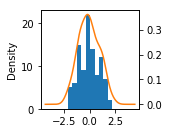

In [17]:
ax1 = plt.subplot2grid((2,3), (0,0))

np.random.seed([3,1415])
df = pd.DataFrame(np.random.randn(100, 2), columns=list('ab'))

df.a.plot(kind='hist', ax=ax1)
df.a.plot(kind='kde', ax=ax1, secondary_y=True)


/home/yg/software/python3rd/anaconda3/envs/rqalpha/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


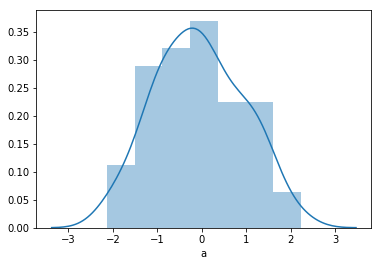

In [19]:
# Prior proposed solutions had KDE plot appear a little "shifted up" for me. seaborn.distplot accurately lined up zeros between hist and kde plots
import seaborn as sns
sns.distplot(df.a)


NameError: name 'quickref' is not defined

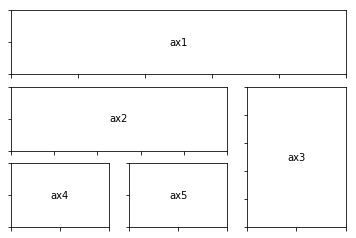

In [6]:
import matplotlib.pyplot as plt
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3)
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax5 = plt.subplot2grid((3, 3), (2, 1))

annotate_axes(fig)

plt.show()
